# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Currently the `df_cleaned_no_outliers` dataframe is being processed in the `03_categorical_gap.ipynb` notebook.

# Reduction in Exercise over Semester

In [ ]:
# Run mixed linear model with random slopes and intercepts
# Drop any rows with NaN or inf values first
df_model = df_cleaned_no_outliers.dropna(subset=['passive_sk_device_total_usage_health_and_fitness', 'day'])

# Import statsmodels
import statsmodels.api as sm

# Scale the predictor variable within each subject
df_model['health_fitness_scaled'] = df_model.groupby('PID')['passive_sk_device_total_usage_health_and_fitness'].transform(
    lambda x: (x - x.mean()) / x.std()
)

X = sm.add_constant(df_model['health_fitness_scaled'])
exog_re = df_model['health_fitness_scaled']

# Try different optimization methods and starting values
optimization_methods = ['bfgs', 'lbfgs', 'cg', 'newton']
best_fit = None
best_llf = float('-inf')

for method in optimization_methods:
    try:
        mlm = sm.MixedLM(
            df_model['day'],
            X, 
            groups=df_model['PID'],
            exog_re=exog_re
        )
        
        # Try different starting values
        start_params = None if method != 'newton' else [1.0] * (len(X.columns) + 2)
        
        fit = mlm.fit(method=method, 
                     start_params=start_params,
                     maxiter=1000,
                     xtol=1e-8,
                     ftol=1e-8)
        
        if fit.llf > best_llf:
            best_fit = fit
            best_llf = fit.llf
            
    except:
        continue

if best_fit is not None:
    print(f"Best converged model using method: {method}")
    print(best_fit.summary())
else:
    print("Failed to converge with any method")


/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_33078/1860209510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['health_fitness_scaled'] = df_model.groupby('PID')['passive_sk_device_total_usage_health_and_fitness'].transform(
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2137: UserWarning: Argument xtol not used by MixedLM.fit
  warnings.warn("Argument %s not used by MixedLM.fit" % x)
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/statsmodels/base/optimizer.p

Best converged model using method: newton
                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     day        
No. Observations:     6510        Method:                 REML       
No. Groups:           105         Scale:                  408.3461   
Min. group size:      39          Log-Likelihood:         -28874.5689
Max. group size:      84          Converged:              Yes        
Mean group size:      62.0                                           
---------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
const                     35.562    0.250 141.992 0.000 35.071 36.053
health_fitness_scaled     -4.643    0.491  -9.457 0.000 -5.606 -3.681
health_fitness_scaled Var 18.357    0.172                            



/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2137: UserWarning: Argument xtol not used by MixedLM.fit
  warnings.warn("Argument %s not used by MixedLM.fit" % x)


# People are lazy on weekends


Average walking/running distance by day of week (mean ± SE):
Monday: 6119.020 ± 336.361
Tuesday: 6776.021 ± 297.620
Wednesday: 6328.284 ± 328.115
Thursday: 6734.659 ± 346.718
Friday: 6304.074 ± 329.417
Saturday: 5255.151 ± 298.485
Sunday: 4644.262 ± 318.805


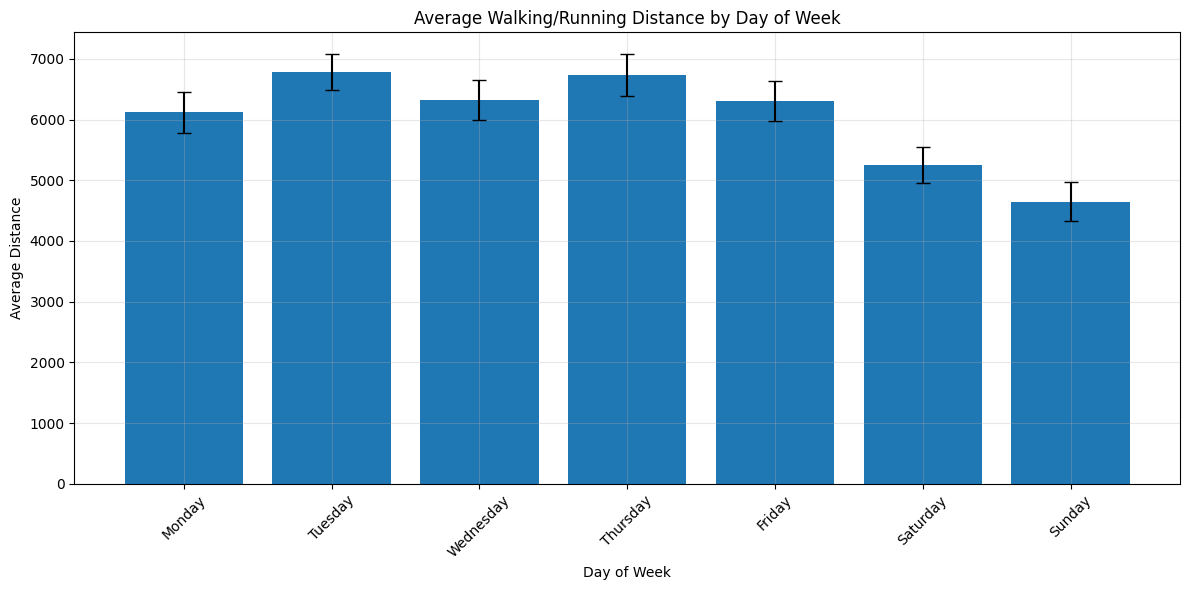

In [ ]:
# Get day of week from trial_date and calculate average distance per day
# Create ordered days starting with Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# First calculate within-subject averages
subject_day_averages = df.groupby(['PID', df['trial_date'].dt.day_name()])['passive_hk_activity_distanceWalkingRunning'].mean().reset_index()

# Then calculate across-subject means and standard errors
day_stats = subject_day_averages.groupby('trial_date')['passive_hk_activity_distanceWalkingRunning'].agg(['mean', 'std']).reindex(days_order)
day_stats['se'] = day_stats['std'] / np.sqrt(df['PID'].nunique())

# Create bar plot with error bars
plt.figure(figsize=(12,6))
plt.bar(day_stats.index, day_stats['mean'])
plt.errorbar(day_stats.index, day_stats['mean'], yerr=day_stats['se'], 
             fmt='none', color='black', capsize=5)

plt.title('Average Walking/Running Distance by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Print the averages and standard errors
print("\nAverage walking/running distance by day of week (mean ± SE):")
for day in days_order:
    print(f"{day}: {day_stats.loc[day, 'mean']:.3f} ± {day_stats.loc[day, 'se']:.3f}")

# IBG - Active Energy Correlation Mechanism

**activeEnergyBurned**

Was there a goal to exercise (based on goals and self-report) - is that what drives the reduction in gap?

Take the two individual goals do they include exercise?

Look at individual differences: Survey data on weather health goals are important to them